<a href="https://colab.research.google.com/github/HDSS4IM/DPAM/blob/main/Task2_Zimbabwe_Education__Data_Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gspread google-auth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.33.0 which is incompatible.


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# Open a sheet from a spreadsheet by name
spreadsheet = gc.open('DPAM Data Perspective')

# If you have the URL, you can do it this way:
# spreadsheet = gc.open_by_url('Your_Spreadsheet_URL')

# Data preparation and Cleaning

In [ ]:
# Get a worksheet by name
worksheet = spreadsheet.worksheet('Zimbabwe_children_under5_interv')

# Get all values from the worksheet
rows = worksheet.get_all_values()
#Convert data to pandas DataFrame (if needed)
import pandas as pd
data = pd.DataFrame.from_records(rows[1:],columns=rows[0])  # Skip header row
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   interview_date   2517 non-null   object
 1   child_age_years  2517 non-null   object
 2   child_birthday   2517 non-null   object
 3   EC6              2517 non-null   object
 4   EC7              2517 non-null   object
 5   EC8              2517 non-null   object
 6   EC9              2517 non-null   object
 7   EC10             2517 non-null   object
 8   EC11             2517 non-null   object
 9   EC12             2517 non-null   object
 10  EC13             2517 non-null   object
 11  EC14             2517 non-null   object
 12  EC15             2517 non-null   object
dtypes: object(13)
memory usage: 255.8+ KB


In [ ]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()

# Step 2: Convert date columns to datetime format
data['interview_date'] = pd.to_datetime(data['interview_date'])
data['child_birthday'] = pd.to_datetime(data['child_birthday'], errors='coerce')

# Step 3: Standardize column names (lowercase and replace spaces with underscores)
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Check if there are still issues with date parsing
parsed_issues = data['child_birthday'].isnull().sum()



# Display the missing values and the first few rows after changes
missing_values, data.head()


(interview_date      0
 child_age_years     0
 child_birthday     26
 ec6                 0
 ec7                 0
 ec8                 0
 ec9                 0
 ec10                0
 ec11                0
 ec12                0
 ec13                0
 ec14                0
 ec15                0
 dtype: int64,
   interview_date child_age_years child_birthday ec6 ec7 ec8 ec9 ec10 ec11  \
 0     2019-03-31               3     2016-02-20   2   2   1   1    2    1   
 1     2019-03-14               3     2015-10-19   2   2   2   1    2    2   
 2     2019-03-17               4     2014-10-26   2   2   2   1    1    1   
 3     2019-03-14               3     2015-03-21   1   2   2   1    2    1   
 4     2019-03-14               3     2015-05-18   2   1   1   1    2    1   
 
   ec12 ec13 ec14 ec15  
 0    1    1    2    2  
 1    2    1    1    1  
 2    2    1    2    1  
 3    1    1    2    1  
 4    2    1    2    1  )

In [39]:
# Convert specified columns to int64
columns_to_convert = ['ec6', 'ec7', 'ec8', 'ec9', 'ec10', 'ec11', 'ec12', 'ec13', 'ec14', 'ec15']
data[columns_to_convert] = data[columns_to_convert].astype('int64')

# Replace values: 2 -> 0, 8 -> 0
data[columns_to_convert] = data[columns_to_convert].replace({2: 0, 8: 0})

# Display the first few rows to confirm the changes
data.head()
# Get distinct values for each of the specified columns
distinct_values = {col: data[col].unique() for col in columns_to_convert}

distinct_values


{'ec6': array([0, 1, 9]),
 'ec7': array([0, 1, 9]),
 'ec8': array([1, 0, 9]),
 'ec9': array([1, 0, 9]),
 'ec10': array([0, 1, 9]),
 'ec11': array([1, 0, 9]),
 'ec12': array([1, 0, 9]),
 'ec13': array([1, 0, 9]),
 'ec14': array([0, 1, 9]),
 'ec15': array([0, 1, 9])}

In [40]:
# Filter the data to exclude rows where any of the specified columns contain the value 9
filtered_data = data[~data[columns_to_convert].isin([9]).any(axis=1)]

# Display the shape and the first few rows of the filtered data
distinct_values = {col: filtered_data[col].unique() for col in columns_to_convert}

distinct_values


{'ec6': array([0, 1]),
 'ec7': array([0, 1]),
 'ec8': array([1, 0]),
 'ec9': array([1, 0]),
 'ec10': array([0, 1]),
 'ec11': array([1, 0]),
 'ec12': array([1, 0]),
 'ec13': array([1, 0]),
 'ec14': array([0, 1]),
 'ec15': array([0, 1])}

In [41]:
# Rename the columns with the provided new names
new_column_names = {
    'ec6': "Can (name) identify or name at least ten letters of the alphabet?",
    'ec7': "Can (name) read at least four simple, popular words?",
    'ec8': "Does (name) know the name and recognize the symbol of all numbers from 1 to 10?",
    'ec9': "Can (name) pick up a small object with two fingers, like a stick or a rock from the ground?",
    'ec10': "Is (name) sometimes too sick to play?",
    'ec11': "Does (name) follow simple directions on how to do something correctly?",
    'ec12': "When given something to do, is (name) able to do it independently?",
    'ec13': "Does (name) get along well with other children?",
    'ec14': "Does (name) kick, bite, or hit other children or adults?",
    'ec15': "Does (name) get distracted easily?"
}

filtered_data.rename(columns=new_column_names, inplace=True)

# Display the first few rows to confirm the column name changes
filtered_data.head()


<ipython-input-41-daeb1d166ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=new_column_names, inplace=True)


,interview_date,child_age_years,child_birthday,Can (name) identify or name at least ten letters of the alphabet?,"Can (name) read at least four simple, popular words?",Does (name) know the name and recognize the symbol of all numbers from 1 to 10?,"Can (name) pick up a small object with two fingers, like a stick or a rock from the ground?",Is (name) sometimes too sick to play?,Does (name) follow simple directions on how to do something correctly?,"When given something to do, is (name) able to do it independently?",Does (name) get along well with other children?,"Does (name) kick, bite, or hit other children or adults?",Does (name) get distracted easily?
0,2019-03-31,3,2016-02-20,0,0,1,1,0,1,1,1,0,0
1,2019-03-14,3,2015-10-19,0,0,0,1,0,0,0,1,1,1
2,2019-03-17,4,2014-10-26,0,0,0,1,1,1,0,1,0,1
3,2019-03-14,3,2015-03-21,1,0,0,1,0,1,1,1,0,1
4,2019-03-14,3,2015-05-18,0,1,1,1,0,1,0,1,0,1


## Extract on-track and off-track cleaned data countries dataset to new Google sheet

In [42]:
# Add a new sheet with a name and specify rows and columns
worksheet_title = 'Zimbabwe_children_under5_Cleaned'

ws = spreadsheet.worksheet(worksheet_title)

# Use the gspread_dataframe to set the DataFrame to the sheet
from gspread_dataframe import set_with_dataframe
# Set the DataFrame to the worksheet
set_with_dataframe(ws, filtered_data)

# Data Analysis

## Descriptive analysis

Statistics for percent correct (Mean) by child age in years

In [71]:
filtered_data = filtered_data.rename(columns=new_column_names)

# Explicitly select only the numeric columns (excluding datetime columns)
numeric_columns = filtered_data.select_dtypes(include='number').columns

#calculate the summary statistics for percent correct by child age in years
summary_stats = filtered_data.groupby('child_age_years')[numeric_columns].mean() * 100

# Display the summary statistics DataFrame directly

print(summary_stats)


                 Can (name) identify or name at least ten letters of the alphabet?  \
child_age_years                                                                      
3                                                         6.377760                   
4                                                        14.153132                   

                 Can (name) read at least four simple, popular words?  \
child_age_years                                                         
3                                                         7.686018      
4                                                        13.379737      

                 Does (name) know the name and recognize the symbol of all numbers from 1 to 10?  \
child_age_years                                                                                    
3                                                        11.120196                                 
4                                                        24.90

Statistics for (Count) by child age in years

In [49]:
filtered_data = filtered_data.rename(columns=new_column_names)

# Explicitly select only the numeric columns (excluding datetime columns)
numeric_columns = filtered_data.select_dtypes(include='number').columns

# Recalculate the summary statistics for percent correct by child age in years
summary_stats_corrected = filtered_data.groupby('child_age_years')[numeric_columns].count()

# Display the summary statistics DataFrame directly
print(summary_stats_corrected)

                 Can (name) identify or name at least ten letters of the alphabet?  \
child_age_years                                                                      
3                                                             1223                   
4                                                             1293                   

                 Can (name) read at least four simple, popular words?  \
child_age_years                                                         
3                                                             1223      
4                                                             1293      

                 Does (name) know the name and recognize the symbol of all numbers from 1 to 10?  \
child_age_years                                                                                    
3                                                             1223                                 
4                                                             

Statistics for (Standard Deviation) by child age in years

In [50]:
filtered_data = filtered_data.rename(columns=new_column_names)

# Explicitly select only the numeric columns (excluding datetime columns)
numeric_columns = filtered_data.select_dtypes(include='number').columns

# Recalculate the summary statistics for percent correct by child age in years
summary_stats_corrected = filtered_data.groupby('child_age_years')[numeric_columns].std()

# Display the summary statistics DataFrame directly
print(summary_stats_corrected)

                 Can (name) identify or name at least ten letters of the alphabet?  \
child_age_years                                                                      
3                                                         0.244456                   
4                                                         0.348704                   

                 Can (name) read at least four simple, popular words?  \
child_age_years                                                         
3                                                         0.266478      
4                                                         0.340566      

                 Does (name) know the name and recognize the symbol of all numbers from 1 to 10?  \
child_age_years                                                                                    
3                                                         0.314511                                 
4                                                         0.43

## educational areas

In [72]:
# Map the questions to the educational areas
educational_areas_mapping = {
    "Literacy + Math": ["Can (name) identify or name at least ten letters of the alphabet?",
                        "Can (name) read at least four simple, popular words?",
                        "Does (name) know the name and recognize the symbol of all numbers from 1 to 10?"],
    "Physical": ["Can (name) pick up a small object with two fingers, like a stick or a rock from the ground?",
                 "Is (name) sometimes too sick to play?"],
    "Learning": ["Does (name) follow simple directions on how to do something correctly?",
                 "When given something to do, is (name) able to do it independently?"],
    "Socio-emotional": ["Does (name) get along well with other children?",
                        "Does (name) kick, bite, or hit other children or adults?",
                        "Does (name) get distracted easily?"]
}

# Create a new DataFrame to display the mapping
mapping_df = pd.DataFrame.from_dict(educational_areas_mapping, orient='index').transpose()
# Display the mapping_df results
from IPython.display import display

display(mapping_df)



,Literacy + Math,Physical,Learning,Socio-emotional
0,Can (name) identify or name at least ten lette...,Can (name) pick up a small object with two fin...,Does (name) follow simple directions on how to...,Does (name) get along well with other children?
1,"Can (name) read at least four simple, popular ...",Is (name) sometimes too sick to play?,"When given something to do, is (name) able to ...","Does (name) kick, bite, or hit other children ..."
2,Does (name) know the name and recognize the sy...,None,None,Does (name) get distracted easily?


In [56]:
# Calculate the index for each educational area by taking the arithmetic average of the relevant columns

# First, create a dictionary to hold the calculated indexes
index_columns = {}

# Calculate the arithmetic average for each area
for area, questions in educational_areas_mapping.items():
    index_columns[area] = filtered_data[questions].mean(axis=1)

# Combine these indexes into a new DataFrame
indexes_df = pd.DataFrame(index_columns)

# Add the child age years to the DataFrame for reference
indexes_df['child_age_years'] = filtered_data['child_age_years']
indexes_df['interview_date'] = filtered_data['interview_date']
indexes_df['child_birthday'] = filtered_data['child_birthday']

# Reorder the columns for better readability
indexes_df = indexes_df[['interview_date', 'child_birthday', 'child_age_years',
                         'Literacy + Math', 'Physical', 'Learning', 'Socio-emotional']]
# Display the first few rows of the indexes DataFrame to the user
print(indexes_df.head())



  interview_date child_birthday child_age_years  Literacy + Math  Physical  \
0     2019-03-31     2016-02-20               3         0.333333       0.5   
1     2019-03-14     2015-10-19               3         0.000000       0.5   
2     2019-03-17     2014-10-26               4         0.000000       1.0   
3     2019-03-14     2015-03-21               3         0.333333       0.5   
4     2019-03-14     2015-05-18               3         0.666667       0.5   

   Learning  Socio-emotional  
0       1.0         0.333333  
1       0.0         1.000000  
2       0.5         0.666667  
3       1.0         0.666667  
4       0.5         0.666667  


In [57]:
# Add a new sheet with a name and specify rows and columns
worksheet_title = 'educational_areas_mapping'

ws = spreadsheet.worksheet(worksheet_title)

# Use the gspread_dataframe to set the DataFrame to the sheet
from gspread_dataframe import set_with_dataframe
# Set the DataFrame to the worksheet
set_with_dataframe(ws, indexes_df)

## Calculate the Cronbach’s Alpha

In [58]:
from scipy.stats import tmean
import numpy as np

# Function to calculate Cronbach's Alpha
def cronbach_alpha(items_scores):
    items_scores = np.array(items_scores)
    item_variances = items_scores.var(axis=1, ddof=1)
    total_score_variances = items_scores.sum(axis=0).var(ddof=1)
    n_items = items_scores.shape[0]
    return (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_score_variances)

# Calculate Cronbach's Alpha for each educational area
cronbach_alphas = {}
num_observations = {}

for area, questions in educational_areas_mapping.items():
    items_scores = filtered_data[questions].transpose()
    cronbach_alphas[area] = cronbach_alpha(items_scores)
    num_observations[area] = len(filtered_data[questions].dropna())

# Create a summary table with Cronbach's Alpha and the number of observations
summary_table = pd.DataFrame({
    'Cronbach\'s Alpha': cronbach_alphas,
    'Number of Observations': num_observations
})

# Display the summary table to the user
print(summary_table.head())



                 Cronbach's Alpha  Number of Observations
Literacy + Math          0.620896                    2516
Physical                -0.113300                    2516
Learning                 0.519670                    2516
Socio-emotional          0.081009                    2516


### Interpretation of Results:
**Literacy + Math (Alpha = 0.6209)**

Interpretation: A Cronbach's Alpha of 0.62 suggests moderate internal consistency among the questions related to Literacy and Math. This indicates that the questions in this group are reasonably consistent and measure a related underlying concept, but there might still be room for improvement in reliability.

**Physical (Alpha = -0.1133)**

Interpretation: A negative Cronbach's Alpha indicates a lack of internal consistency, and it might suggest that the two items in this category (EC9 and EC10) are not measuring the same concept or are inversely related. This could imply that the items in the Physical category might not be well-suited for combining into a single index, or there could be issues with how the items are coded or interpreted.

**Learning (Alpha = 0.5197)**

Interpretation: An Alpha of 0.52 is on the lower side, suggesting that the questions related to Learning have some degree of internal consistency, but they are not very strongly correlated. This means the items may not be capturing the same concept consistently.

**Socio-emotional (Alpha = 0.0810)**

Interpretation: A very low Cronbach's Alpha (0.08) indicates poor internal consistency among the items related to Socio-emotional skills. This suggests that these items may not be measuring the same underlying concept, or there could be significant variability in how these questions are interpreted.

**Number of Observations**:
For each category, the number of observations (2,516) reflects the number of respondents (children) for whom data was available for all questions in that category. Since the number is consistent across all categories, it indicates that the entire dataset was used for each calculation.

**Summary**:

*   **Literacy_Math** shows moderate reliability, suggesting that these questions can be used together to form an index.
*   **Physical** has a negative Alpha, indicating that the items may not be related or might need to be reconsidered.

*   **Learning** has lower reliability, implying that the questions are somewhat related but may need refinement.

*   **Socio-emotional** shows poor consistency, suggesting these items are not measuring a cohesive concept.

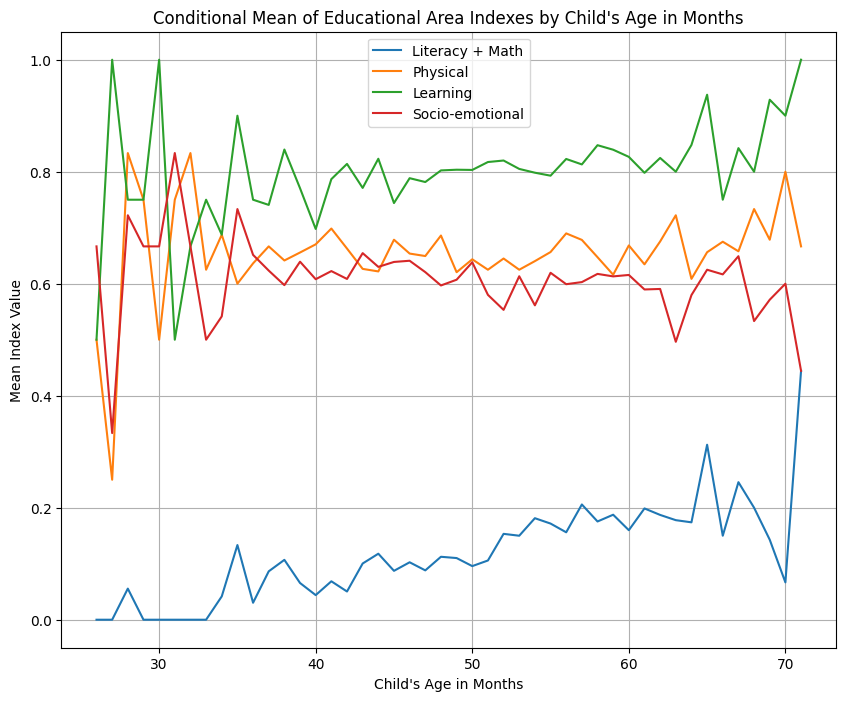

In [64]:
import matplotlib.pyplot as plt
# Calculate the child's age in months at the time of the interview
indexes_df['age_in_months'] = (indexes_df['interview_date'] - indexes_df['child_birthday']).dt.days // 30

# Convert all relevant columns to numeric and coerce any errors to NaN
indexes_df['age_in_months'] = pd.to_numeric(indexes_df['age_in_months'], errors='coerce')
indexes_df['child_age_years'] = pd.to_numeric(indexes_df['child_age_years'], errors='coerce')
indexes_df[['Literacy + Math', 'Physical', 'Learning', 'Socio-emotional']] = indexes_df[[
    'Literacy + Math', 'Physical', 'Learning', 'Socio-emotional']].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values that might interfere with the groupby operation
indexes_df_cleaned = indexes_df.dropna(subset=['age_in_months', 'Literacy + Math', 'Physical', 'Learning', 'Socio-emotional'])

# Calculate the conditional mean
conditional_means = indexes_df_cleaned.groupby('age_in_months').mean()[['Literacy + Math', 'Physical', 'Learning', 'Socio-emotional']]

# Plot the conditional means
plt.figure(figsize=(10, 8))
for column in conditional_means.columns:
    plt.plot(conditional_means.index, conditional_means[column], label=column)

plt.xlabel('Child\'s Age in Months')
plt.ylabel('Mean Index Value')
plt.title('Conditional Mean of Educational Area Indexes by Child\'s Age in Months')
plt.legend()
plt.grid(True)
plt.show()


The plot you see represents how the average values of the educational area indexes change as children grow older, specifically by their age in months. Here's a detailed explanation:

**X-Axis: Child's Age in Months**


*   The horizontal axis (X-axis) shows the child's age in months. This is calculated as the difference between the interview date and the child's birthdate.
*   The ages are presented in months to provide a more granular view of the child's development over time, rather than just grouping by years.

**Y-Axis: Mean Index Value**
*   The vertical axis (Y-axis) shows the mean index value for each educational area (Literacy + Math, Physical, Learning, Socio-emotional).
*   The index values range between 0 and 1 because they represent the proportion of correct responses to the relevant questions within each category.

**Lines Representing Each Educational Area**
*   **Literacy + Math**: This line shows the average performance in areas related to literacy and math (e.g., recognizing letters, reading simple words).
*   **Physical**: This line reflects physical abilities (e.g., fine motor skills, whether the child is sometimes too sick to play).
*   **Learning**: This represents cognitive learning abilities (e.g., following directions, completing tasks independently).
*   **Socio-emotional**: This line indicates social and emotional skills (e.g., getting along with others, not getting easily distracted).

**Interpretation of the Plot:**

**Trend Analysis**: The plot shows how the average scores in each area evolve as children get older.
*   **Increasing Trends**: If you see an upward trend, it suggests that as children age, they tend to perform better in that area. For instance, Literacy + Math might show an upward trend, indicating that older children are better at recognizing letters and numbers.
*   **Flat or Decreasing Trends**: If a line is flat or declining, it might indicate that performance in that area doesn’t change much with age or could decrease for various reasons.

**Comparison Between Areas**: By comparing the different lines, you can see how development in one area compares to another. For example, if the Socio-emotional line is consistently higher or lower than the Physical line, it suggests differences in how children develop skills in these areas.
**Why This Analysis Matters:**

*   **Developmental Insights**: Understanding how these indexes change with age helps identify critical periods in a child’s development. For example, if Literacy + Math skills rapidly improve between certain months, it might indicate an ideal window for targeted educational interventions.
*   **Program Evaluation**: For educators or program designers, this analysis can inform the effectiveness of programs aimed at improving certain skills. If a program targets physical skills but the Physical index doesn’t improve as expected, adjustments might be needed.

**Summary:**
The plot helps visualize the developmental trajectory of children across different educational domains. By analyzing how these indexes change with age, stakeholders can better understand the timing and effectiveness of educational interventions, ultimately supporting better outcomes for children.

## OLS regression results

In [68]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Assuming indexes_df is already prepared as per previous steps

# Remove rows with missing values
cleaned_data = indexes_df.dropna(subset=['age_in_months', 'Literacy + Math', 'Physical', 'Learning', 'Socio-emotional'])

# Prepare the data for OLS regression
X_cleaned = cleaned_data['age_in_months']
X_cleaned = sm.add_constant(X_cleaned)  # Adds a constant term to the predictor

# Run OLS regression for each educational area index
results_cleaned = {}

for area in ['Literacy + Math', 'Physical', 'Learning', 'Socio-emotional']:
    y_cleaned = cleaned_data[area]
    model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()
    results_cleaned[area] = {
        'Coefficient on Age': model_cleaned.params['age_in_months'],
        'Standard Error': model_cleaned.bse['age_in_months'],
        'R-squared': model_cleaned.rsquared,
        'Number of Observations': int(model_cleaned.nobs)
    }

# Convert the results to a DataFrame for display
ols_results_cleaned_df = pd.DataFrame(results_cleaned).transpose()

# Display the OLS regression results
from IPython.display import display

display(ols_results_cleaned_df)


,Coefficient on Age,Standard Error,R-squared,Number of Observations
Literacy + Math,0.005526,0.000609,0.032057,2490.0
Physical,0.000206,0.000668,0.000038,2490.0
Learning,0.002697,0.000792,0.004641,2490.0
Socio-emotional,-0.001596,0.000607,0.002769,2490.0


**Interpretation:**


*   **Coefficient on Age**: This indicates the average change in the index value per month of age. For example, in the Literacy + Math category, the index increases by approximately 0.0055 for each additional month of age.

*   **Standard Error**: This measures the precision of the estimated coefficient. Smaller values indicate more precise estimates.

*   **R-squared**: This indicates the proportion of the variance in the index that can be explained by the child's age. The values are relatively low, suggesting that while age does have an impact, there are other factors also contributing to the index scores.

*   **Number of Observations**: This shows the number of data points used in each regression. After cleaning, 2,490 observations were used.